# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train an MLP to classify images from the MNIST database.

### 1. Load MNIST Database

``` python
from keras.datasets import mnist

# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()
```
Downloading data from https://s3.amazonaws.com/img-datasets/mnist.npz

使用`(X_train, y_train), (X_test, y_test) = mnist.load_data()`经常会遇到网络问题导致中断。  

**解决办法：**  
复制上面链接使用迅雷进行下载，然后解压缩得到`npy`二进制文件。  

In [32]:
import numpy as np

X_train = np.load( "mnist/x_train.npy" )
y_train = np.load( "mnist/y_train.npy" )
X_test = np.load( "mnist/x_test.npy" )
y_test = np.load( "mnist/y_test.npy" )

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


In [33]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


### 2. Visualize the First Six Training Images

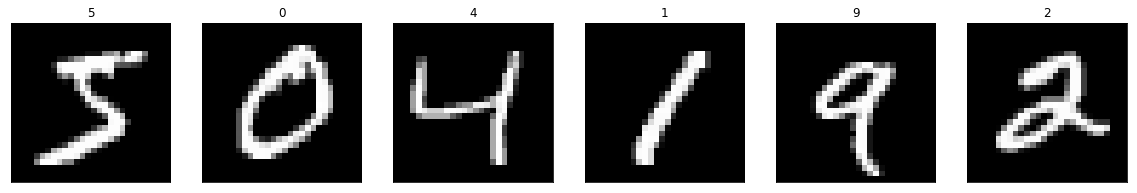

In [34]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

### 3. View an Image in More Detail

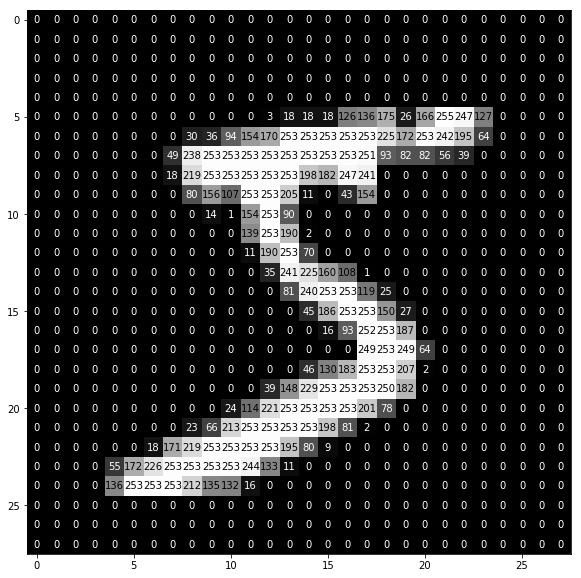

In [35]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (10,10)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

### 4. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [36]:
# rescale [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255 

### 5. Encode Categorical Integer Labels Using a One-Hot Scheme

使用onehot的直接原因是现在多分类cnn网络的输出通常是**softmax**层，它的输出是一个概率分布，从而要求输入的标签也以概率分布的形式出现，进而方便计算交叉熵。

In [37]:
from keras.utils import np_utils

# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


### 6. Define the Model Architecture

In [38]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# define the model
model = Sequential()
# flatter layer：将图片矩阵转换为向量
model.add(Flatten(input_shape=X_train.shape[1:])) # (28, 28)
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


### 7. Compile the Model

In [39]:
# compile the model, specify the loss function and optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

### 8. Calculate the Classification Accuracy on the Test Set (Before Training)

In [40]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=1)
accuracy = 100 * score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

score # [loss, accuracy]

10000/10000 [==============================] - 1s 72us/step
Test accuracy: 6.5000%


[2.3546462242126465, 0.065]

### 9. Train the Model

In [41]:
from keras.callbacks import ModelCheckpoint   

# train the model
# 保存能让验证集达到最佳准确率的权重
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=1, save_best_only=True)

hist = model.fit(X_train, y_train, batch_size=128, epochs=15,
                 validation_split=0.2, callbacks=[checkpointer],
                 verbose=1, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 7s 140us/step - loss: 0.2894 - acc: 0.9109 - val_loss: 0.1274 - val_acc: 0.9613
Epoch 2/15
48000/48000 [==============================] - 7s 139us/step - loss: 0.1195 - acc: 0.9636 - val_loss: 0.1001 - val_acc: 0.9690
Epoch 3/15
48000/48000 [==============================] - 6s 131us/step - loss: 0.0820 - acc: 0.9739 - val_loss: 0.0821 - val_acc: 0.9757
Epoch 4/15
48000/48000 [==============================] - 7s 143us/step - loss: 0.0658 - acc: 0.9799 - val_loss: 0.0967 - val_acc: 0.9751
Epoch 5/15
48000/48000 [==============================] - 6s 134us/step - loss: 0.0537 - acc: 0.9824 - val_loss: 0.0868 - val_acc: 0.9774
Epoch 6/15
48000/48000 [==============================] - 6s 135us/step - loss: 0.0452 - acc: 0.9857 - val_loss: 0.0951 - val_acc: 0.9776
Epoch 7/15
48000/48000 [==============================] - 6s 132us/step - loss: 0.0404 - acc: 0.9872 - val_loss: 0.0847 - 

### 10. Load the Model with the Best Classification Accuracy on the Validation Set

In [42]:
# load the weights that yielded the best validation accuracy
model.load_weights('mnist.model.best.hdf5')

### 11. Calculate the Classification Accuracy on the Test Set

In [43]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=1)
accuracy = 100 * score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

10000/10000 [==============================] - 1s 71us/step
Test accuracy: 97.6400%


可以尝试下列变化造成模型的验证损失和测试准确度：  
隐藏层数量，隐藏层节点数量，丢弃层，激活函数，优化器，batch尺寸